In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas_datareader as web

Text(0, 0.5, 'Price')

<Figure size 720x576 with 0 Axes>

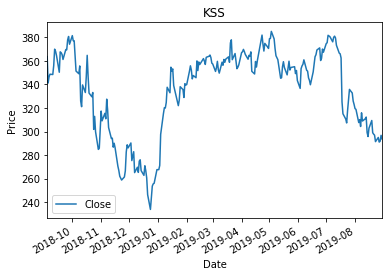

In [36]:
df=web.get_data_yahoo("NFLX",start="2018-09-01",end="2019-09-01")
data=df["Close"]
data=pd.DataFrame(data)

plt.figure(figsize=(10,8))
data.plot()
plt.title("KSS")
plt.ylabel("Price")

In [37]:
data["returns"]=np.log(data/data.shift(1))

In [38]:
data.dropna(inplace=True)


In [40]:
data["direction"]=np.sign(data["returns"]).astype(int)
data.head()

,Close,returns,direction
Date,,,
2018-09-05,341.179993,-0.063644,-1
2018-09-06,346.459991,0.015357,1
2018-09-07,348.679993,0.006387,1
2018-09-10,348.410004,-0.000775,-1
2018-09-11,355.929993,0.021354,1


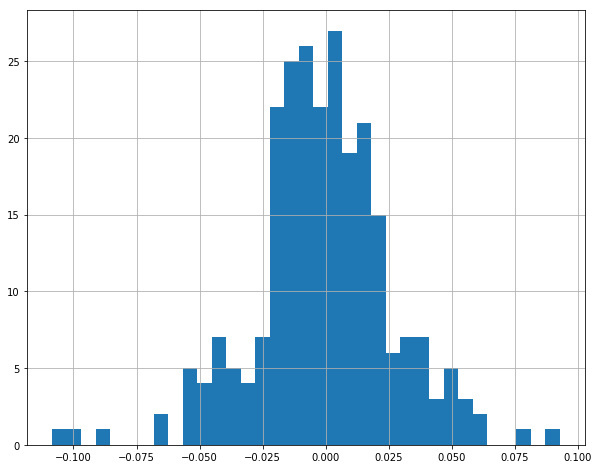

In [41]:
data["returns"].hist(bins=35,figsize=(10,8))

In [42]:
lags=2

def create_lags(data):
    global cols
    cols=[]
    for lag in range(1,lags+1):
        col="lag_{}".format(lag)
        data[col]=data["returns"].shift(lag)
        cols.append(col)

create_lags(data)

In [43]:
data.head()

,Close,returns,direction,lag_1,lag_2
Date,,,,,
2018-09-05,341.179993,-0.063644,-1,NaN,NaN
2018-09-06,346.459991,0.015357,1,-0.063644,NaN
2018-09-07,348.679993,0.006387,1,0.015357,-0.063644
2018-09-10,348.410004,-0.000775,-1,0.006387,0.015357
2018-09-11,355.929993,0.021354,1,-0.000775,0.006387


In [44]:
data.dropna(inplace=True)

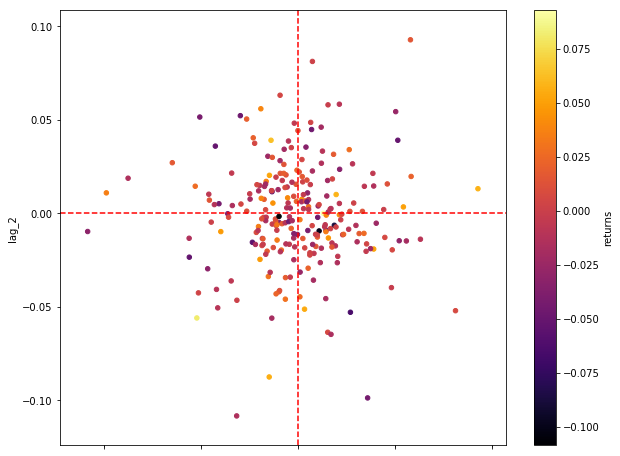

In [45]:
data.plot.scatter(x="lag_1",y="lag_2",c="returns",cmap="inferno",figsize=(10,8),colorbar=True)
plt.axvline(0,c="r",ls="--")
plt.axhline(0,c="r",ls="--")

In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
data["pos_ols_1"]=model.fit(data[cols],data["returns"]).predict(data[cols])
data["pos_ols_2"]=model.fit(data[cols],data["direction"]).predict(data[cols])

In [48]:
data[["pos_ols_1","pos_ols_2"]].head()

,pos_ols_1,pos_ols_2
Date,,
2018-09-07,0.000761,-0.123523
2018-09-10,-0.000872,-0.026834
2018-09-11,-0.000809,-0.039545
2018-09-12,-0.000341,-0.043795
2018-09-13,-0.000501,-0.012520


In [49]:
data[["pos_ols_1","pos_ols_2"]]=np.where(data[["pos_ols_1","pos_ols_2"]]>0,1,-1)

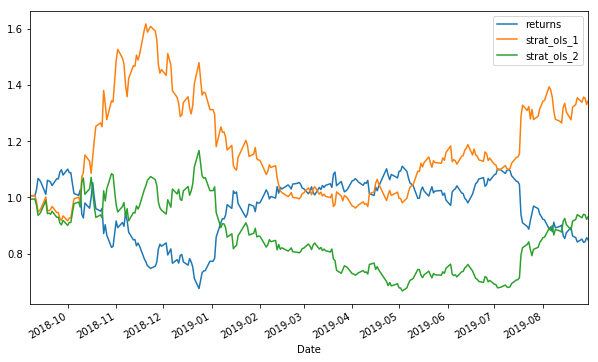

In [50]:
data["strat_ols_1"]=data["pos_ols_1"]*data["returns"]
data["strat_ols_2"]=data["pos_ols_2"]*data["returns"]
data[["returns","strat_ols_1","strat_ols_2"]].sum().apply(np.exp)
data[["returns","strat_ols_1","strat_ols_2"]].cumsum().apply(np.exp).plot(figsize=(10,6))